In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("Tweets.csv")
data

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...                        ...            ...   
14635   

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Task 1 - How many tweets per sentiment and airline?

In [3]:
df = data.groupby(['airline','airline_sentiment']).size()
df = df.to_frame()
df = df.unstack()
df.columns = df.columns.droplevel()
df.columns

Index(['negative', 'neutral', 'positive'], dtype='object', name='airline_sentiment')

In [4]:
df

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152

In [5]:
fig = px.bar(df, x=df.index, y=["negative","neutral","positive"])
fig.show()

First, I grouped the DataFrame on the two columns; 'airline' and 'airline_sentiment'. I then applied size() method on the resulting groupby object to get a Series object containing frequency count. I then applied the to_frame() method to change the series object to a dataframe. The resulting dataframe had an hierarchical index, so I applied the unstack() method to form different columns with respect to that feature. Finally, I dropped a level from the multi-level column index using the droplevel() function.<br>
These sequence of steps was to prepare the data to be plotted as wide format data by plotly.express

## Task 2  - What are the most common causes of dissatisfaction in each company?

In [6]:
virgin = data[data['airline']=='Virgin America']
united = data[data['airline']=='United']
southwest = data[data['airline']=='Southwest']
delta = data[data['airline']=='Delta']
us = data[data['airline']=='US Airways']
american = data[data['airline']=='American']

airlines = [virgin,united,southwest,delta,us,american]
names = ["Virgin America","United","Southwest","Delta","US Airways","American"]

for i in range(len(airlines)):
    reason = pd.value_counts(airlines[i].negativereason)
    reasons_df = pd.Series({'nunique': len(reason), 'unique values': reason.index.tolist()})
    reason.append(reasons_df)
    df = pd.DataFrame(reason)
    df.index.name = 'negativereason'
    df.columns = ['count']
    fig = px.bar(df, x=df.index, y=df['count'], title='Causes for Dissatisfaction for '+ names[i])
    fig.update_layout(legend=dict(
    yanchor="top",
    xanchor="left",
    ))
    fig.show()

To prepare the data,I first sliced the dataset based on the airlines. I then evaluated the number of times each reason appeared for each airline using the value_counts() function and presented these results in a dataframe.<br>
I then used a pie chart to show the percentages of all the reasons given. The reason with the highest percentage is the most common. It is evident that <b>customer service issue</b> was the most common reason for dissatisfaction across all the airlines.<br>

## Task 3 - For each airline company, what are the most frequent words in negative sentiments?

In [7]:
#Extracting the tweets for each airline
virgin_america = data[(data['airline'] == "Virgin America") & (data['airline_sentiment'] == "negative")]
va_tweets = virgin_america['text'].values

united =  data[(data['airline'] == "United") & (data['airline_sentiment'] == "negative")]
un_tweets = united['text'].values

s_west = data[(data['airline'] == "Southwest") & (data['airline_sentiment'] == "negative")]
sw_tweets = s_west['text'].values

delta = data[(data['airline'] == "Delta") & (data['airline_sentiment'] == "negative")]
d_tweets = delta['text'].values

us = data[(data['airline'] == "US Airways") & (data['airline_sentiment'] == "negative")]
us_tweets = us['text'].values

american = data[(data['airline'] == "American") & (data['airline_sentiment'] == "negative")]
a_tweets = american['text'].values



In [8]:
#Removing hashtag, @user, and links
import re

neg_tweets = [va_tweets,un_tweets,sw_tweets,d_tweets,us_tweets,a_tweets]

for i in neg_tweets:
    for x in range(len(i)):
        i[x] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(i[x])).split())

neg_tweets[5]

array(['why would I even consider continuing your point program when I received no perks or continued bad customer service senseless',
       'thanks for getting back to me But I will find other airlines in the future',
       'why would I pay 200 to reactivate my points that are only useful for certain flights that aren t even worth 200',
       ..., 'right on cue with the delays',
       'leaving over 20 minutes Late Flight No warnings or communication until we were 15 minutes Late Flight That s called shitty customer svc',
       'you have my money you change my flight and don t answer your phones Any other suggestions so I can make my commitment'],
      dtype=object)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chepk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chepk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


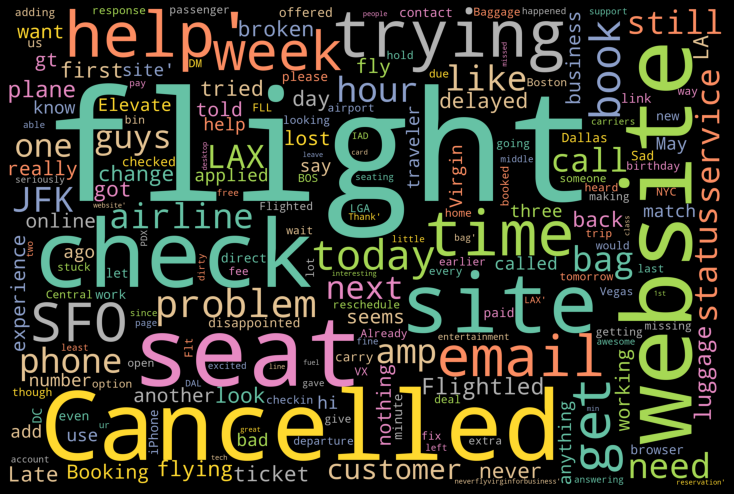

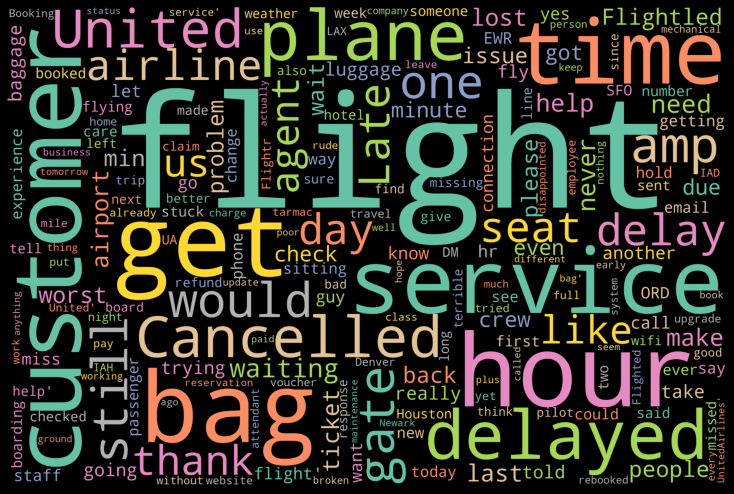

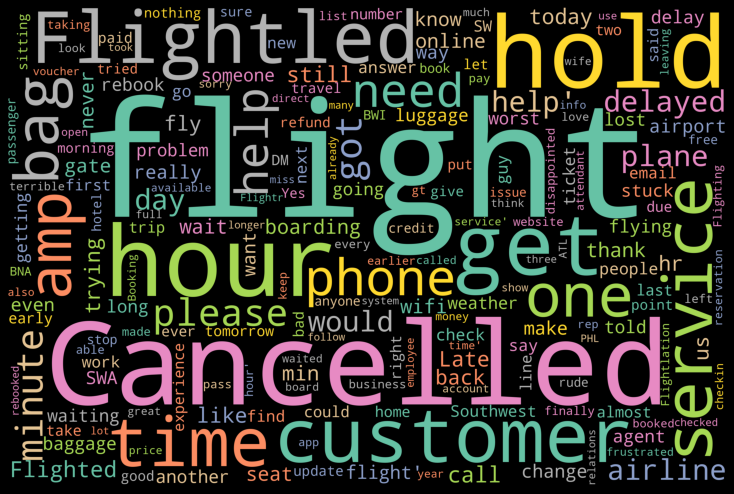

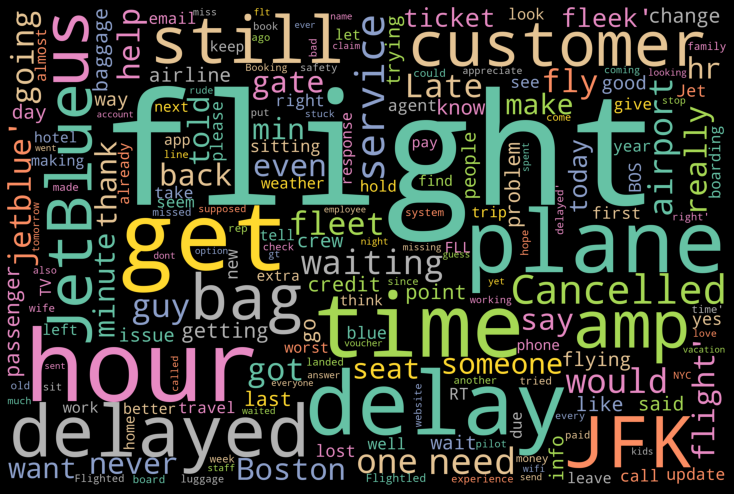

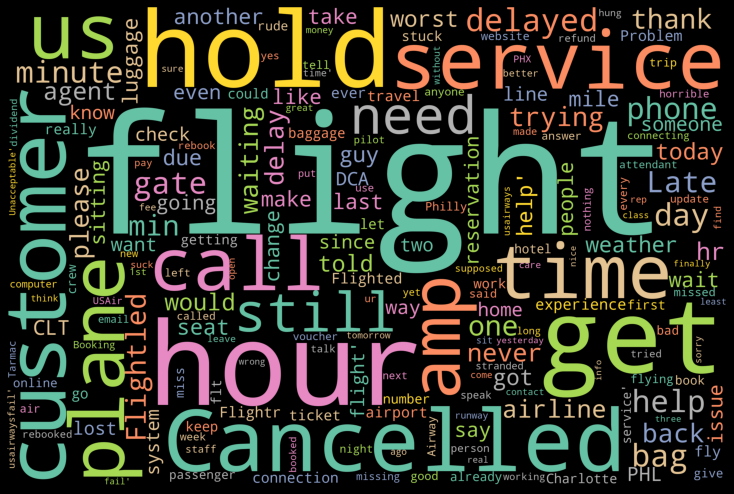

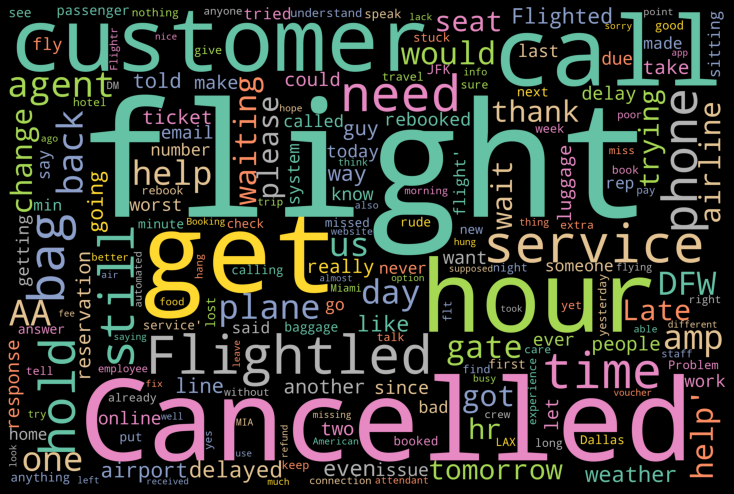

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt') 
from nltk.tokenize import RegexpTokenizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

### Removing stopwords and punctuations ###



stop_words = set(stopwords.words('english')) 

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
        
for t in neg_tweets:
    text = []
    for i, msg in enumerate(t):

        tokenizer = RegexpTokenizer(r'\w+')
        word_tokens = tokenizer.tokenize(msg) 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 

        text.append(listToString(filtered_sentence))

    neg_sentiments_wc = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2',
                                  collocations=False, stopwords = stop_words).generate(str(text))
    plt.figure(figsize = (10, 8), facecolor = 'k')
    plt.imshow(neg_sentiments_wc)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()




The word cloud shows a visual representation of the frequency of words in the tweets corpus. The size of the words os relative to their frequencies. The wordclods above represent the negative sentiments for the airlines in the following order:
<ul>
    <li> Virgin America</li>
   <li>United</li>
   <li>Southwest</li>
   <li>Delta</li>
   <li>US Airways</li>
   <li>American</li>
</ul>
The most frequent words across the airlines are: flight, customer and cancelled

## Task 4 - What are the most common opinions expressed?

### Topic modelling with Latent Dirichlet Allocation

In [10]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.utils import simple_preprocess


In [11]:
#Extracting the tweets for each airline
virgin_america = data[data['airline'] == "Virgin America"]
united = data[data['airline'] == "United"]
s_west = data[data['airline'] == "Southwest"]
delta = data[data['airline'] == "Delta"]
us = data[data['airline'] == "US Airways"]
american = data[data['airline'] == "American"]


In [12]:
#Functions to perform the pre processing steps on the entire dataset
nltk.download('wordnet')
stemmer = SnowballStemmer("english")

tweets = [virgin_america['text'].values.tolist(),united['text'].values.tolist(),s_west['text'].values.tolist(),delta['text'].values.tolist(),
          us['text'].values.tolist(),american['text'].values.tolist()]


#Removing hashtag, @user, and links
import re

for i in tweets:
    for x in range(len(i)):
        i[x] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(i[x])).split())


tweets = str(tweets).rstrip("\n")
tweets = [tweets]

def lemmatize_stemming(t):
    return stemmer.stem(WordNetLemmatizer().lemmatize(t, pos='v'))

# Tokenize and lemmatize
def preprocess(t):
    result=[]
    for token in gensim.utils.simple_preprocess(t) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result


processed_tweets = []

for tweet in tweets:
    processed_tweets.append(preprocess(str(tweet)))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chepk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
processed_tweets

[['say',
  'plus',
  'add',
  'commerci',
  'experi',
  'tacki',
  'today',
  'mean',
  'need',
  'trip',
  'aggress',
  'blast',
  'obnoxi',
  'entertain',
  'guest',
  'face',
  'littl',
  'recours',
  'thing',
  'serious',
  'flight',
  'seat',
  'play',
  'thing',
  'fli',
  'near',
  'time',
  'worm',
  'away',
  'miss',
  'prime',
  'opportun',
  'hat',
  'parodi',
  'amaz',
  'arriv',
  'hour',
  'earli',
  'good',
  'know',
  'suicid',
  'second',
  'lead',
  'caus',
  'death',
  'teen',
  'pretti',
  'graphic',
  'better',
  'minim',
  'iconographi',
  'great',
  'deal',
  'think',
  'trip',
  'haven',
  'go',
  'trip',
  'fli',
  'fabul',
  'seduct',
  'sky',
  'stress',
  'away',
  'travel',
  'thank',
  'schedul',
  'excit',
  'cross',
  'countri',
  'flight',
  'hear',
  'great',
  'thing',
  'virgin',
  'america',
  'daystogo',
  'fli',
  'week',
  'couldn',
  'fulli',
  'seat',
  'larg',
  'gentleman',
  'help',
  'fli',
  'know',
  'amaz',
  'awesom',
  'want',
  'fare'

In [14]:
#Create a dictionary from 'processed_tweets' containing the number of times a word appears in the training set.
dictionary = corpora.Dictionary((processed_tweets))

#Create the Bag-of-words model
bow_corpus = [dictionary.doc2bow(tweet) for tweet in processed_tweets]

#Running LDA
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 2, 
                                   id2word = dictionary,                                    
                                   passes = 2,
                                   workers = 2)


#For each topic, explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.050*"flight" + 0.016*"thank" + 0.011*"servic" + 0.011*"cancel" + 0.011*"hour" + 0.011*"delay" + 0.011*"help" + 0.009*"time" + 0.008*"wait" + 0.008*"hold"


Topic: 1 
Words: 0.045*"flight" + 0.018*"thank" + 0.014*"hour" + 0.013*"custom" + 0.011*"help" + 0.011*"cancel" + 0.011*"time" + 0.009*"delay" + 0.008*"servic" + 0.007*"plane"




In [15]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim  
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.003473  0.0       1        1  88.226591
1     -0.003473  0.0       2        1  11.773409, topic_info=         Term         Freq        Total Category  logprob  loglift
2232   flight  4670.000000  4670.000000  Default  30.0000  30.0000
6004    thank  1553.000000  1553.000000  Default  29.0000  29.0000
2859     hour  1025.000000  1025.000000  Default  28.0000  28.0000
1432   custom   763.000000   763.000000  Default  27.0000  27.0000
6092     time   896.000000   896.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1013    check    46.884397   456.211551   Topic2  -5.4620  -0.1359
131    airlin    50.676261   550.965308   Topic2  -5.3842  -0.2469
135   airport    41.764306   362.649306   Topic2  -5.5776  -0.0221
2241  flightl    45.465317   525.832255   Topic2  -5.4927  -0.3087
678      book    43.746015   517.095577   Topic2  -5.5312  -0.3305

[190 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
57        1  0.835115        actual
57        2  0.162685        actual
106       1  0.870589         agent
106       2  0.130328         agent
131       1  0.907498        airlin
...     ...       ...           ...
6728      1  0.835149          wide
6728      2  0.208787          wide
6790      1  0.919542          work
6790      2  0.081418          work
6867      1  0.629716  youcandobett

[247 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

After experimenting with different number of topics to feed to the model, I settled on just 2 topics. This is because the topics were becoming redundant and there was minimal distinction between say the thid and fourth topics. More topics resulted in smaller topics with similar words. <br>
The possible topics could represent negative and positive/neutral. From previous visualizations, we know that there were more negative comments. Hence, the area of the circle representing topic 1 is larger to illustrate the importance of the topic over the entire corpus. The word 'flight' is seen to have a high relative weight in both topics since it if the most frequently appearing word. <BR>
<b>Visualization:</b><BR>
Exploring the Intertopic Distance Plot helps to learn about how topics relate to each other, including potential higher-level structure between topics. The two topics are far apart to show that they are not very similar, even though they may contain similar words. Topic 1 has a higher overall term frequency for the 30 most common words compared to topic 2. <br> To view its top most frequent and/or “relevant” terms, adjust using different values of the λ parameter.

## Task 5 - Provide useful additional information.

In [16]:
df = data.groupby(['airline','negativereason']).size()
df = df.to_frame()
df = df.unstack()
df.columns = df.columns.droplevel()
print(type(df))
bf = df['Bad Flight']
fig = px.bar(bf, x=bf.index, y= bf.values)
fig.update_layout(
    title="Complaints About Bad Flight",
    xaxis_title="Airlines",
    yaxis_title="Count",
)
fig.show()


<class 'pandas.core.frame.DataFrame'>


C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [17]:
ll = df['Lost Luggage']
fig = px.bar(ll, x=ll.index, y= ll.values)
fig.update_layout(
    title="Complaints About Lost Luggage",
    xaxis_title="Airlines",
    yaxis_title="Count",
)
fig.show()

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [18]:
#Which airline has the most overall complains
df["Total"] = df.sum(axis=1)
total = df["Total"]
fig = px.bar(total, x=total.index, y= total.values)
fig.update_layout(
    title="Total Overall Complains",
    xaxis_title="Airlines",
    yaxis_title="Count",
)
fig.show()

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



I added the number of complains for each airline and it was evident that United had the most complaints, followed by US Airways. Virgin America had the least complaints.

In [21]:
df = data.groupby(['airline','tweet_location']).size()
df = df.to_frame()
df = df.unstack()
df.columns = df.columns.droplevel()
df = df.sum(axis = 1, skipna = True) 
df = pd.DataFrame(df)
df.columns = ['Count']
y = df.Count.values

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [20]:
#Comparing the tweet location count for the airlines
fig = px.bar(df, x=df.index, y= y)
fig.update_layout(
    title="Count of the different tweet locations ",
    xaxis_title="Airlines",
    yaxis_title="Count",
)
fig.show()

C:\Users\chepk\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



I counted the number of locations from where the tweets were tweeted. It is not surprising that United had the most location count since it had the most tweets. What is noticed, however, is that the count for Delta and Southwest is almost similar even though they have different tweet counts. The same goes for American and US Airways. This shows the relation between the number and localization of negative tweets. While there may be fewer complaints, they may be spread out across a wider area.